# Webcam Tests

In [1]:
from src.camera_and_model_initialisation import open_camera
from src.tests import test_camera, test_flux_video

Open webcam

In [2]:
open_camera()

Webcam détectée.


< cv2.VideoCapture 000002655E687AF0>

Test Webcam

Webcam détectée.


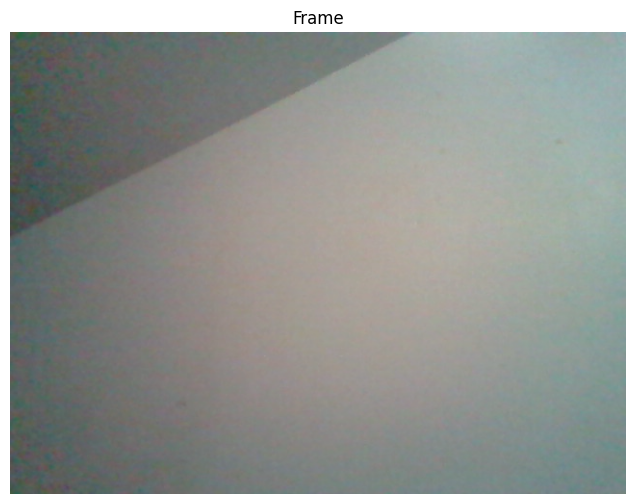

In [3]:
test_camera()

Test live video

In [4]:
test_flux_video()

Caméra détectée | Résolution : 640x480 | FPS théorique : 30
Démarrage du flux vidéo.
Arrêt du flux vidéo.
Résolution : 640x480
FPS théorique de la caméra : 30
Nombre total de frames : 176
Durée totale : 6.39 sec
FPS moyen : 27.53


# Object detection model tests

Define model and webcam parameters.
Choose the model, score threshold to detect an object, maximum number of object on a frame and objects to detect.

In [5]:
from src.tests import test_model_sur_image, test_model_sur_une_frame

In [6]:
#DIfferents modeles avec differentes quantizations peuvent etre utilises. lite2 en float16 semble offrir la meilleure precision/performance.
#Cette version semble egalement presenter peu d'halucinations.
MODEL_NAME = "efficientdet_lite2_float16.tflite"
# MODEL_NAME = "efficientdet_lite2_float32.tflite"
# MODEL_NAME = "efficientdet.tflite"
# MODEL_NAME = "ssd_mobilenet_v2.tflite"

#Seuil de confiance minimal pour la détection
#Augmenter le seuil selon la precision souhaitée.
SCORE_THRESHOLD = 0.3

# Nombre maximum d'objets détectés par image
MAX_RESULTS = 3

# Définition des objets cibles
TARGET_CLASSES = [
    "person", "laptop", "mouse", "keyboard", "cell phone", "monitor", "tv",
    "clock", "bottle", "cup", "chair", "couch", "potted plant",
    "book"]

#Paramètres de la webcam
CAMERA_INDEX = 0  # Par défaut, la première webcam
FRAME_WIDTH = 640  # Largeur de la vidéo
FRAME_HEIGHT = 480  # Hauteur de la vidéo


Test model on a picture

In [7]:
test_model_sur_image("cat_and_dog.jpg")

Modèle trouvé : models/efficientdet_lite2_float32.tflite
Objets détectés : dog: 0.88, cat: 0.77


Test model on a webcam frame

In [12]:
test_model_sur_une_frame()

Webcam détectée.
Modèle trouvé : models/efficientdet_lite2_float32.tflite
Objets détectés : person: 0.88


# Use model to detect object in real time

In [13]:
from src.object_detection import real_time_object_detection

In [14]:
camera_parameters = {
    "camera_index" : CAMERA_INDEX,
    "frame_width" : FRAME_WIDTH,
    "frame_height" : FRAME_HEIGHT
}

model_parameters = {
    "model_name" : MODEL_NAME,
    "score_threshold" : SCORE_THRESHOLD,
    "max_results" : MAX_RESULTS,
    "target_classes" : TARGET_CLASSES
}

The function has been built to process one frame at a time preventing desynchronisation between the webcam and the detected objects.
More powerful computers get higher FPS. Change model or webcam resolution if fps are too low.

If too many false positive object detections, increase score threshold.

In [15]:
real_time_object_detection(camera_parameters=camera_parameters, model_parameters=model_parameters)

Webcam détectée.
Modèle trouvé : models/efficientdet_lite2_float16.tflite
Callback reçu - Temps de traitement : 0.30s
Objets détectés : person: 0.62
Callback reçu - Temps de traitement : 0.28s
Objets détectés : person: 0.61
Callback reçu - Temps de traitement : 0.27s
Objets détectés : person: 0.61
Callback reçu - Temps de traitement : 0.26s
Objets détectés : person: 0.64
Callback reçu - Temps de traitement : 0.26s
Objets détectés : person: 0.64
Callback reçu - Temps de traitement : 0.27s
Objets détectés : person: 0.68
Callback reçu - Temps de traitement : 0.27s
Objets détectés : person: 0.63
Callback reçu - Temps de traitement : 0.27s
Objets détectés : person: 0.67
Callback reçu - Temps de traitement : 0.27s
Objets détectés : person: 0.68
Callback reçu - Temps de traitement : 0.20s
Objets détectés : person: 0.68
Callback reçu - Temps de traitement : 0.21s
Objets détectés : person: 0.66
Callback reçu - Temps de traitement : 0.21s
Objets détectés : person: 0.68
Callback reçu - Temps de t